In [5]:
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
from obspy import read

import matplotlib.pyplot as plt 


In [6]:
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
dir = '/Users/parisil/Work/farmtracking/'
c = Client("INGV")

#ti = UTCDateTime("2016-11-02T23:55:00.000")
#tf = UTCDateTime("2016-11-04T00:05:00.000")


ti = UTCDateTime("2017-03-17T00:00:00.000")
tf = UTCDateTime("2017-04-17T00:00:00.000")

#ti = UTCDateTime("2016-10-29T00:00:00.000")
#tf = UTCDateTime("2016-10-29T23:59:00.000")

pre_filt = (0.005, 0.006, 45.0, 50.0)

lat = 43.0147
lon = 13.050
minr = 0
maxr = 0.05 ###degrees
maxr_ev = 1
st = c.get_waveforms(starttime=ti, endtime=tf,
                     network='IV',station='FDMO',location='',channel='HH*',
                    attach_response=True)

#sta = c.get_stations(starttime=ti, endtime=tf, latitude=lat, longitude=lon, minradius=minr, maxradius=maxr)

eve = c.get_events(starttime=ti,endtime=tf,latitude=lat, longitude=lon,
                   minradius=minr, maxradius=maxr_ev,minmagnitude=0.)

eve.plot('local')
#st.remove_response(output='DISP', pre_filt=pre_filt)
#st.plot()
print(eve.__str__(print_all=True))
file=dir+'alleventsMar'
eve.write(file, format='zmap')
#st.write('IV.FDMO..HHrespdeconvolved45Hz.mseed',format='seed')


#print('merging')
#st.merge(fill_value=0)
#print('deconvolving')
#st.remove_response(output='DISP')

#print(st)
#st.trim(starttime=UTCDateTime("2016-10-29T00:00:00.000000"),
#          endtime= UTCDateTime("2016-11-08T00:00:00.000000")    
#         )
#st.cutout(starttime=UTCDateTime("2016-10-29T00:00:00.000000"),
#         endtime= UTCDateTime("2016-10-29T00:00:00.010000")    
#         )
#print('resampling')
#st.resample(sampling_rate=25)
#print(st)

ValueError: The current client does not have a dataselect service.

In [38]:

stcopy = st.copy()


In [40]:
st = stcopy.copy()
print(st)
st.trim(starttime=UTCDateTime("2016-11-03T00:00:00.000000"),
          endtime= UTCDateTime("2016-11-04T00:00:00.000000") ,   
         nearest_sample=False
       )
print(st)


3 Trace(s) in Stream:
IV.FDMO..HHZ | 2016-10-31T00:00:00.010000Z - 2016-11-01T00:00:00.010000Z | 25.0 Hz, 2160001 samples
IV.FDMO..HHN | 2016-10-31T00:00:00.030000Z - 2016-11-01T00:00:00.030000Z | 25.0 Hz, 2160001 samples
IV.FDMO..HHE | 2016-10-31T00:00:00.010000Z - 2016-11-01T00:00:00.010000Z | 25.0 Hz, 2160001 samples

In [1]:
from scipy.io import savemat

sta = c.get_stations(starttime=ti, endtime=tf, latitude=lat, longitude=lon, minradius=minr, maxradius=maxr)
print(sta)
print(st)
i=2
#mdict =['']
#for i, tr in enumerate(st):
#mdict = {k: str(v) for k, v in tr.stats.items()}
mdict = {k: str(v) for k, v in st[i].stats.items()}
mdict['units'] = 'displ [m]' 

mdict['sta_lat'] = str(sta[0][0].latitude)
mdict['sta_lon'] = str(sta[0][0].longitude)

mdict['station'] = st[2].stats.station
mdict['network'] = st[2].stats.network


mdict['dataZ'] = st[2].data 
#mdict['timeZ'] = st[2].times()
mdict['starttimeZ'] = st[2].stats.starttime
mdict['endtimeZ'] = st[2].stats.endtime
mdict['sampling_rateZ'] = st[2].stats.sampling_rate



mdict['dataN'] = st[0].data 
#mdict['timeN'] = st[0].times()
mdict['starttimeN'] = st[0].stats.starttime
mdict['endtimeN'] = st[0].stats.endtime
mdict['sampling_rateN'] = st[0].stats.sampling_rate

mdict['dataE'] = st[1].data 
#mdict['timeE'] = st[1].times()
mdict['starttimeE'] = st[1].stats.starttime
mdict['endtimeE'] = st[1].stats.endtime
mdict['sampling_rateE'] = st[1].stats.sampling_rate

#mdict['dataN'] = st[1].data 
#mdict['dataE'] = st[20].data 

savemat("/Users/parisil/Work/farmtracking/IV.FDMO..HH.2016-11-01.25Hz.mat", mdict)

NameError: name 'c' is not defined

In [17]:
import numpy as np

t0 = UTCDateTime("2016-10-29T00:00:00.000")
t1 = UTCDateTime("2016-10-29T23:59:59.99999")

st1d = st.copy()
st1d.slice(starttime=t0,endtime=t1)


tr = st1d[2]  ##### change
data = tr.data
t = tr.times()
f = open ('IV.FDMO..HHZ_20161029.ascii','w') ######change

for index in range(len(t)):
    f.write(str(t[index]) + " " +str(data[index])+ "\n" )
    
f.close()

KeyboardInterrupt: 

In [47]:
st[2].stats.endtime
    


2016-11-08T00:05:01.830000Z

In [32]:
from obspy import read
#st = read('/Users/parisil/Work/farmtracking/IV.FDMO_29102016-06112016.mseed')
#st.plot()
stbZ = st.select(channel="HHZ")
stbN = st.select(channel="HHN")
stbE = st.select(channel="HHE")
#stbZ.plot()
st

652 Trace(s) in Stream:

IV.FDMO..HHE | 2016-10-29T00:00:00.000000Z - 2016-10-30T06:40:26.520000Z | 100.0 Hz, 11042653 samples
...
(650 other traces)
...
IV.FDMO..HHZ | 2016-11-06T15:27:40.810000Z - 2016-11-07T23:59:02.910000Z | 100.0 Hz, 11708211 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [13]:

sta = c.get_stations(starttime=ti, endtime=tf, latitude=lat, longitude=lon, minradius=minr, maxradius=maxr)
sta[0][0].latitude

43.0365

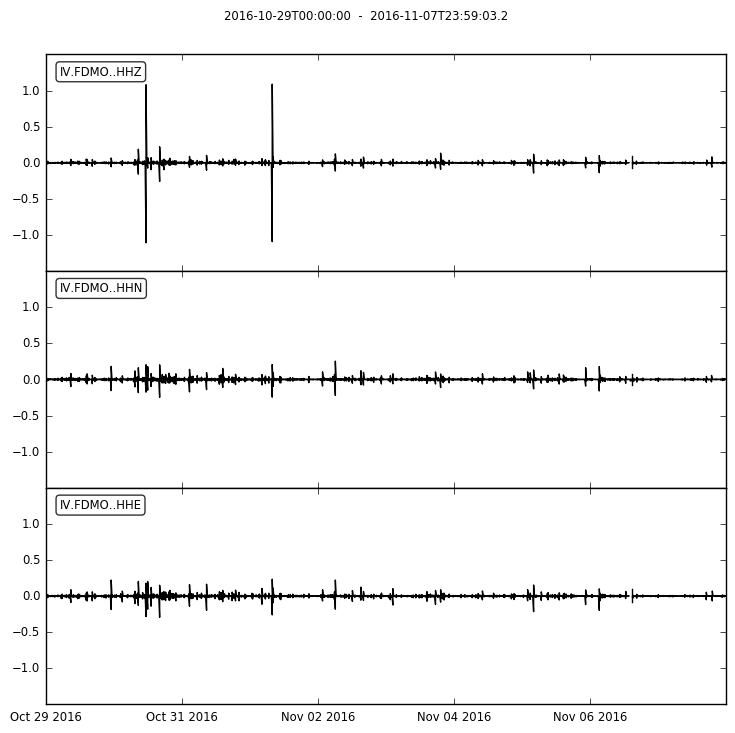

NameError: name 'eve' is not defined

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#st = read('IV.FDMO_29102016-06112016.mseed')
stcut = st.copy()
stcut.plot()
ev45 = eve.filter("magnitude >= 4.")
#print(ev45.__str__(print_all=True))
ev45.plot('local')
for event in ev45:
    #print(event.origins[0].time)
    tcut = event.origins[0].time
    stcut.cutout(tcut, tcut+360)

stcut.merge(fill_value=0)
stcut.plot()

#stcut.write('IV.FDMO..HHrespdeconvolved45Hz_evl4e0for360s.mseed',format='mseed')

In [14]:
t0=UTCDateTime("2016-10-30T00:00:00.000")
t1=UTCDateTime("2016-10-30T23:59:59.999")

#stcut = read('IV.FDMO..HHrespdeconvolved45Hz.mseed')
#stcutcopy = stcut.copy()
stcut1day = stcut.slice(starttime=t0,endtime=t1)
data = stcut1day[2].data
npts = stcut1day[2].stats.npts
d3600=[]
dt = 3600 #seconds
sw =  dt / stcut1day[2].stats.delta 
print(sw)
count = 0

for i in range (0,npts-1):
    print(count)

    print(count:count+sw)
#    #d3600.append(dataabs[i:i+sw].sum())  
#    a = np.average(dataabs[count:count+sw],weights=None)
#    d3600.append(a)
    count = count+sw+1
    
#plt.plot(data)
#plt.plot(d3600)
#plt.ylim([0,20000])
#plt.show()
#file=dir+'movaverage3600s.eps'
#plt.savefig(file )
#tr=stbZ.copy
#tr.data=d60
#tr.plot()

SyntaxError: invalid syntax (<ipython-input-14-7e41cc42611f>, line 18)

In [2]:
plt.plot(d3600)
plt.show()
plt.plot(data)
plt.show()

NameError: name 'plt' is not defined

In [3]:
ev = eve.filter("magnitude >= 3.5")
print(ev.__str__(print_all=True))

NameError: name 'eve' is not defined

In [355]:
file=dir+'allevents'
f = open(file,'w')
for event in eve:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
f.close()

cat = eve.filter("time > 2016-10-29T00:00","time < 2016-10-29T12:00")
file=dir+'2016-10-29T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-10-29T12:00","time < 2016-10-29T23:59:59.99")
file=dir+'2016-10-29T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()


cat = eve.filter("time > 2016-10-30T00:00","time < 2016-10-30T12:00")
file=dir+'2016-10-30T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-10-30T12:00","time < 2016-10-30T23:59:59.99")
file=dir+'2016-10-30T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-10-31T00:00","time < 2016-10-31T12:00")
file=dir+'2016-10-31T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-10-31T12:00","time < 2016-10-31T23:59:59.99")
file=dir+'2016-10-31T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()


cat = eve.filter("time > 2016-11-01T00:00","time < 2016-11-01T12:00")
file=dir+'2016-11-01T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-01T12:00","time < 2016-11-01T23:59:59.99")
file=dir+'2016-11-01T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-02T00:00","time < 2016-11-02T12:00")
file=dir+'2016-11-02T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-02T12:00","time < 2016-11-02T23:59:59.99")
file=dir+'2016-11-02T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()


cat = eve.filter("time > 2016-11-03T00:00","time < 2016-11-03T12:00")
file=dir+'2016-11-03T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-03T12:00","time < 2016-11-03T23:59:59.99")
file=dir+'2016-11-03T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-04T00:00","time < 2016-11-04T12:00")
file=dir+'2016-11-04T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-04T12:00","time < 2016-11-04T23:59:59.99")
file=dir+'2016-11-04T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()


cat = eve.filter("time > 2016-11-05T00:00","time < 2016-11-05T12:00")
file=dir+'2016-11-05T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-05T12:00","time < 2016-11-05T23:59:59.99")
file=dir+'2016-11-05T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()


cat = eve.filter("time > 2016-11-06T00:00","time < 2016-11-06T12:00")
file=dir+'2016-11-06T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-06T12:00","time < 2016-11-06T23:59:59.99")
file=dir+'2016-11-06T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-07T00:00","time < 2016-11-07T12:00")
file=dir+'2016-11-07T00'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()

cat = eve.filter("time > 2016-11-07T12:00","time < 2016-11-07T23:59:59.99")
file=dir+'2016-11-07T12'
f = open(file,'w')
for event in cat:
    deps.append(event.origins[0].depth)
    f.write(event.short_str()+' '+str(event.origins[0].depth/1000)+'\n')
    
#f.write(cat.__str__(print_all=True)) 
f.close()



In [44]:
from obspy.geodetics.base import gps2dist_azimuth

t0=UTCDateTime("2016-10-30T00:00:00.000")
t1=UTCDateTime("2016-10-30T23:59:59.999")
eve = c.get_events(starttime=t0,endtime=t1,latitude=lat, longitude=lon,
                   minradius=minr, maxradius=maxr_ev,minmagnitude=4.5)
print(eve)
lat2 = eve[0].origins[0].latitude
lon2 = eve[0].origins[0].longitude
gps2dist_azimuth(lat, lon, lat2, lon2, a=6378137.0, f=0.0033528106647474805)

4 Event(s) in Catalog:
2016-10-30T12:07:00.210000Z | +42.842,  +13.076 | 4.5 Mw | manual
2016-10-30T07:13:05.210000Z | +42.693,  +13.226 | 4.2 ML | manual
2016-10-30T06:44:30.670000Z | +42.855,  +13.085 | 4.4 ML | manual
2016-10-30T06:40:17.360000Z | +42.832,  +13.111 | 6.5 Mw | manual


(19321.935885345647, 173.75759023481857, 353.77509406159106)

In [64]:
dir = '/Users/parisil/Work/farmtracking/'
t0=UTCDateTime("2016-10-30T00:00:00.000")
t1=UTCDateTime("2016-10-30T23:59:59.999")
eve = c.get_events(starttime=ti,endtime=tf,latitude=lat, longitude=lon,
                   minradius=minr, maxradius=maxr_ev,minmagnitude=0.)



#stbZcut = stbZ.slice(starttime=t0,endtime=t1)
#stbEcut = stbE.slice(starttime=t0,endtime=t1)
#stbNcut = stbN.slice(starttime=t0,endtime=t1)
#file=dir+'20161101_24hrs_Z.eps'
#print(file)
stZ =  st.select(channel="HHZ")
stZcut = stZ.slice(starttime=t0,endtime=t1)
#stbZcut.plot(type='dayplot',outfile=dir+'20161031_24hrs_Z.eps')
#stbNcut.plot(type='dayplot',outfile=dir+'ev01112017N.eps')
#stbEcut.plot(type='dayplot',outfile=dir+'ev01112017E.eps')
#stbNcut.plot()
#,size=(2000,4000)
file=dir+'20161030_24hrs_Z.eps'
stZcut.plot(type="dayplot", interval=60,one_tick_per_line=True,outfile=file,
             events=[{"time": UTCDateTime("2016-10-30T12:07:00.210000"), "text": "Mw 4.5, dist 19 km"},
                    {"time": UTCDateTime("2016-10-30T07:13:05.210000"), "text": "Mw 4.2, dist 38 km"},
                    {"time": UTCDateTime("2016-10-30T06:44:30.670000"), "text": "Mw 4.4, dist 18 km"},
                    {"time": UTCDateTime("2016-10-30T06:40:17.360000"), "text": "Mw 6.5, dist 21 km"}]
           )
#outfile=file,
#vertical_scaling_range=5e3,
#one_tick_per_line=True,
# right_vertical_labels=False,
#color=['k', 'r', 'b', 'g'],
one_tick_per_line=True,

In [2]:
st.plot()

NameError: name 'st' is not defined

In [ ]:
from obspy import read

st = read("https://examples.obspy.org/GR.BFO..LHZ.2012.108")

st.filter("lowpass", freq=0.1, corners=2)

st.plot(type="dayplot", interval=60, right_vertical_labels=False,

        vertical_scaling_range=5e3, one_tick_per_line=True,

        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,

        events={'min_magnitude': 6.5})

In [16]:
straw.merge(fill_value=0)
stdec.merge(fill_value=0)
stdecfil.merge(fill_value=0)

t0 = UTCDateTime("2016-10-29T00:00:00.000")
t1 = UTCDateTime("2016-10-29T23:59:59.999")

straw.slice(starttime=t0,endtime=t1)
stdec.slice(starttime=t0,endtime=t1)
stdecfil.slice(starttime=t0,endtime=t1)

stdec

3 Trace(s) in Stream:
IV.FDMO..HHE | 2016-10-29T00:00:00.000000Z - 2016-11-07T23:59:03.200000Z | 100.0 Hz, 86394321 samples
IV.FDMO..HHN | 2016-10-29T00:00:00.000000Z - 2016-11-07T23:59:00.460000Z | 100.0 Hz, 86394047 samples
IV.FDMO..HHZ | 2016-10-29T00:00:00.000000Z - 2016-11-07T23:59:02.910000Z | 100.0 Hz, 86394292 samples

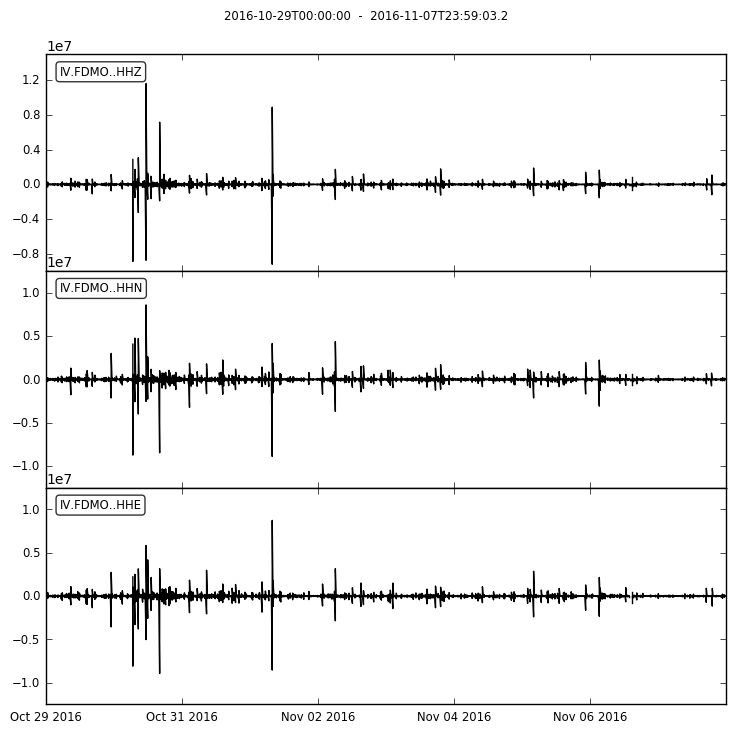

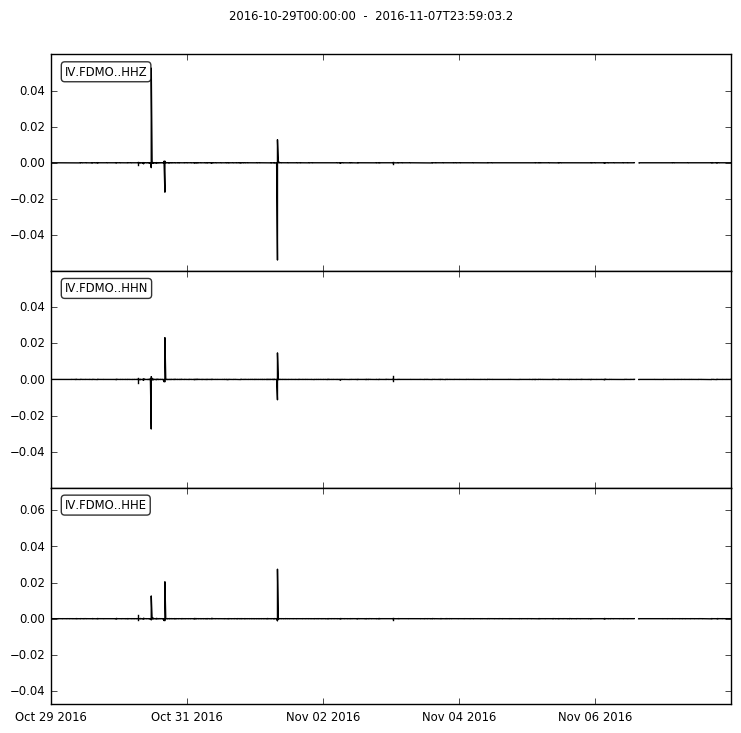

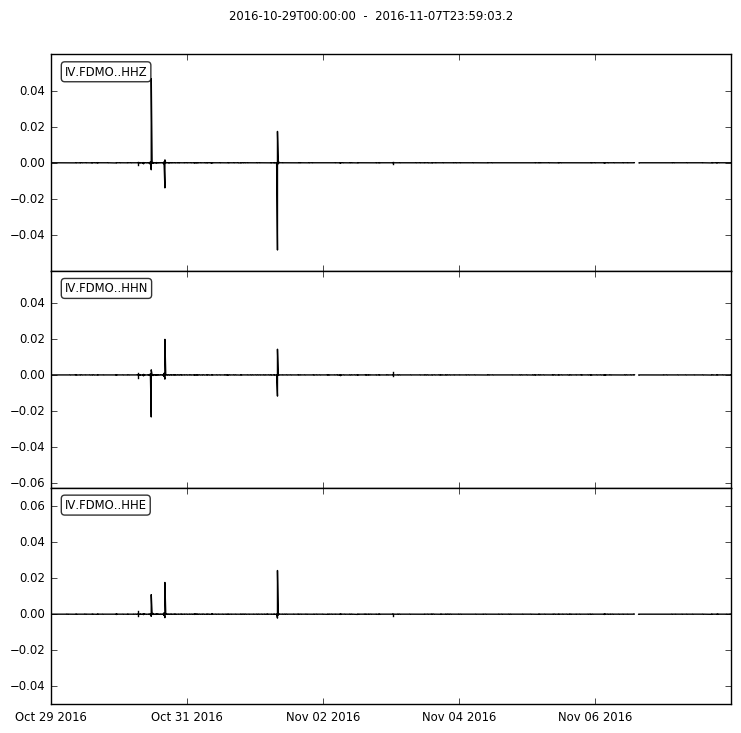

In [6]:
stcopy = st.copy()
straw = st.copy()
stdec = st.copy()
stdecfil = st.copy()

pre_filt = (0.005, 0.006, 45.0, 50.0)

t0 = UTCDateTime("2016-10-29T00:00:00.000")
t1 = UTCDateTime("2016-10-29T23:59:59.999")
straw.slice(starttime=t0,endtime=t1)
stdec.slice(starttime=t0,endtime=t1)
stdecfil.slice(starttime=t0,endtime=t1)

stdec.remove_response(output='DISP')
stdecfil.remove_response(output='DISP', pre_filt=pre_filt)

straw.plot()
stdec.plot()
stdecfil.plot()

In [1]:
from obspy.core import UTCDateTime

ti = UTCDateTime("2016-11-02T23:55:00.000")
ti.julday()

NameError: name 'UTCDateTime' is not defined